In [2]:
## ライブラリの準備
from re import X
import sys
import random
import copy
import matplotlib.pyplot as plt
# import networkx as nx
import numpy as np
# import matplotlib.animation as animation
from IPython import display

## 壁を表す定数
WALL = 10000

In [52]:
class Maze:
  PATH = ' '
  WALL = 'x'

  def __init__(self, width, height, seed=0):
    self.width = width
    self.height = height
    if self.width < 5 or self.height < 5:
      sys.exit()
    if self.width % 2 == 0:
      self.width += 1
    if self.height % 2 == 0:
      self.height += 1
    self.maze = [[self.PATH for x in range(self.width)] for y in range(self.height)]
    #乱数を固定
    #random.seed(seed)

  def set_outer_wall(self):
    for y in range(0, self.height):
      for x in range(0, self.width):
        if x == 0 or y == 0 or x == self.width-1 or y == self.height-1:
          self.maze[y][x] = self.WALL
    return self.maze

  def set_inner_wall(self):
    for y in range(2, self.height-1, 2):
      for x in range(2, self.width-1, 2):
        self.maze[y][x] = self.WALL
    return self.maze

  def set_maze_boutaoshi(self):
    self.set_outer_wall()
    self.set_inner_wall()
    for y in range(2, self.height-1, 2):
      for x in range(2, self.width-1, 2):
        while True:
          wall_x = x
          wall_y = y
          if y == 2:
            direction = random.randrange(0, 4)
          else:
            direction = random.randrange(0, 3)
          if direction == 0:
            wall_x += 1
          elif direction == 1:
            wall_y += 1
          elif direction == 2:
            wall_x -= 1
          elif direction == 3:
            wall_y -= 1
          if self.maze[wall_y][wall_x] != self.WALL:
            self.maze[wall_y][wall_x] = self.WALL
            break

    self.maze[1][-2] = 'G'
    self.maze[-2][1] = 'S'

    return self.maze


#迷路の高さと幅を入力（5以上の奇数で）
width=15
height=15

maze1 = Maze(width, height)
maze_data =maze1.set_maze_boutaoshi()

maze_data

[['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
 ['x', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'G', 'x'],
 ['x', ' ', 'x', 'x', 'x', ' ', 'x', ' ', 'x', 'x', 'x', 'x', 'x', ' ', 'x'],
 ['x', ' ', 'x', ' ', ' ', ' ', 'x', ' ', 'x', ' ', ' ', ' ', ' ', ' ', 'x'],
 ['x', ' ', 'x', ' ', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ' ', 'x'],
 ['x', ' ', 'x', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'x', ' ', ' ', ' ', 'x'],
 ['x', ' ', 'x', ' ', 'x', 'x', 'x', ' ', 'x', 'x', 'x', 'x', 'x', ' ', 'x'],
 ['x', ' ', 'x', ' ', 'x', ' ', ' ', ' ', ' ', ' ', 'x', ' ', ' ', ' ', 'x'],
 ['x', 'x', 'x', ' ', 'x', 'x', 'x', ' ', 'x', 'x', 'x', ' ', 'x', 'x', 'x'],
 ['x', ' ', ' ', ' ', ' ', ' ', 'x', ' ', 'x', ' ', ' ', ' ', ' ', ' ', 'x'],
 ['x', ' ', 'x', 'x', 'x', ' ', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ' ', 'x'],
 ['x', ' ', ' ', ' ', 'x', ' ', ' ', ' ', 'x', ' ', ' ', ' ', ' ', ' ', 'x'],
 ['x', ' ', 'x', 'x', 'x', ' ', 'x', 'x', 'x', 'x', 'x', ' ', 'x

In [53]:
maze_list = []
for i in range(height):
  maze_list.append(''.join(maze_data[i][:]))
print(maze_list)

['xxxxxxxxxxxxxxx', 'x            Gx', 'x xxx x xxxxx x', 'x x   x x     x', 'x x xxxxxxxxx x', 'x x       x   x', 'x x xxx xxxxx x', 'x x x     x   x', 'xxx xxx xxx xxx', 'x     x x     x', 'x xxx xxxxxxx x', 'x   x   x     x', 'x xxx xxxxx x x', 'xS  x   x   x x', 'xxxxxxxxxxxxxxx']


In [54]:
class Maze:

    def __init__(self, texts):
        """
        初期化用メソッド

        ・texts: 迷路の初期化用テキスト．次のような形式を受け取れる:
            maze_texts = [
                'xxxxxxxxxxx',
                'x       xGx',
                'x xxxxx x x',
                'x     x   x',
                'x xxx xxxxx',
                'x x x     x',
                'x x xxxxx x',
                'x   x     x',
                'x xxx xxx x',
                'xS    x   x',
                'xxxxxxxxxxx',
            ]
        ただし，xが壁で空白が進めるマス，SとGがそれぞれスタート地点とゴール地点を表す
        """

        self.height, self.width = len(texts), len(texts[0])  ## 横幅と高さを取得
        self.data = [[0 for j in range(self.width)]
                     for i in range(self.height)]    ## 迷路のデータを初期化

        for y, text in enumerate(texts):
            for x, s in enumerate(text):
                if s == 'x':
                    self.data[y][x] = WALL  ## 壁だったらWALLの値で更新
                elif s == 'S':
                    self.start = (x, y)     ## スタート地点を記録
                elif s == 'G':
                    self.goal = (x, y)      ## ゴール地点を記録




    def plot_maze(self, ax=None):
        """
        壁を黒，そうでない場所を白，スタート地点を青丸，ゴール地点を赤丸の形式でプロットする

        ・ax: プロットするaxisを指定する．デフォルトはNone
        """

        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(6,6))

        ax.axis('off')

        im = ax.imshow(self.data, cmap='Greys', origin='lower')

        sc_st = ax.scatter([self.start[0]], [self.start[1]], c='b', s=300)
        tx_st = ax.text(self.start[0], self.start[1], 'S', ha='center', va='center',
                        fontsize=15, c='w', weight='bold')

        sc_go = ax.scatter([self.goal[0]],  [self.goal[1]],  c='r', s=300)
        tx_go = ax.text(self.goal[0],  self.goal[1],  'G', ha='center', va='center',
                        fontsize=15, c='w', weight='bold')

        return [im] + [sc_st] + [tx_st] + [sc_go] + [tx_go]



    def plot_path(self, path, ax=None):
        """
        迷路と経路をプロットする

        ・path: 表示したい経路．座標のリスト形式を受け付ける（座標は(x,y)のタプル形式を想定）
        ・ax: プロットするaxisを指定する．デフォルトはNone
        """

        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(6,6))

        ax.axis('off')

        im = ax.imshow(self.data, cmap='Greys', origin='lower')

        arrows = []
        for b, g in zip(path[:-1], path[1:]):
            d = (g[0]-b[0], g[1]-b[1])
            ar = ax.arrow(*b, *d, length_includes_head=True, head_width=0.2, zorder=1)
            arrows.append(ar)

        sc_st = ax.scatter([self.start[0]], [self.start[1]], c='b', s=300)
        tx_st = ax.text(self.start[0], self.start[1], 'S', ha='center', va='center',
                        fontsize=15, c='w', weight='bold')

        sc_go = ax.scatter([self.goal[0]],  [self.goal[1]],  c='r', s=300)
        tx_go = ax.text(self.goal[0],  self.goal[1],  'G', ha='center', va='center',
                        fontsize=15, c='w', weight='bold')

        return [im] + arrows + [sc_st] + [tx_st] + [sc_go] + [tx_go]



    def plot_field(self, field, func, ax=None, cm='Greens'):
        """
        経路探索に使用したフィールドの値を迷路に重ねてプロットする

        ・field: プロットしたいフィールド．迷路と同サイズを想定
        ・func: 探索に使用したヒューリスティック関数
        ・ax: プロットするaxisを指定する．デフォルトはNone
        ・cm: フィールドの値を表示する際のカラーマップの種類．デフォルトはGreen
        """

        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(6,6))

        ax.axis('off')

        vmx = self.width*self.height - np.sum(np.array(self.data))/WALL \
                + func((0,0), (self.width-2, self.height-2))
        fld = ax.imshow(field, cmap=cm, origin='lower',
                  vmin=0.,  vmax=vmx)

        wall_arr = np.array([[([0,0,0,1] if self.data[y][x] == WALL else [0,0,0,0])
                              for x in range(self.width)]
                             for y in range(self.height)], dtype=float)
        wall = ax.imshow(wall_arr, cmap='Greys', origin='lower')

        sc_st = ax.scatter([self.start[0]], [self.start[1]], c='b', s=300)
        tx_st = ax.text(self.start[0], self.start[1], 'S', ha='center', va='center',
                        fontsize=15, c='w', weight='bold')

        sc_go = ax.scatter([self.goal[0]],  [self.goal[1]],  c='r', s=300)
        tx_go = ax.text(self.goal[0],  self.goal[1],  'G', ha='center', va='center',
                        fontsize=15, c='w', weight='bold')

        return [fld] + [wall] + [sc_st] + [tx_st] + [sc_go] + [tx_go]

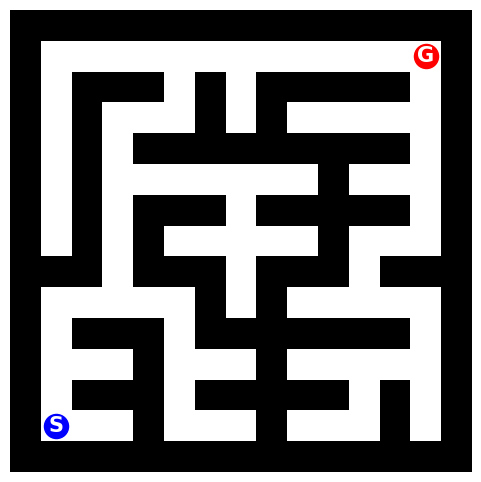

In [55]:
maze_list = maze_list[::-1] ## 迷路の2次元リストを逆順に
m = Maze(maze_list)
m.plot_maze();

In [56]:
def execute_Astar(maze, func_H, animate=False):
    """
    A*アルゴリズムを実行して最短経路を示す

    * maze: 経路探索する迷路
    * func_H: ヒューリスティック関数 H
    """




    ## 調査し終えたどうか（および壁かどうか）を表すフィールド
    ## （未調査なら0，調査済みあるいは壁なら1以上）
    close_field = copy.deepcopy(maze.data)

    ## スタートからの最短距離(関数G)をメモしていくフィールド
    G_field = [[WALL for x in range(maze.width)] for y in range(maze.height)]

    ## A*アルゴリズムで使用する関数Fをメモしていくフィールド
    F_field = [[WALL for x in range(maze.width)] for y in range(maze.height)]

    ## 調査予定の座標セット
    open_set = {maze.start}

    ## スタート地点のGをゼロに，Fの値をG+Hに設定する
    G_field[maze.start[1]][maze.start[0]] = 0
    F_field[maze.start[1]][maze.start[0]] = func_H(maze.start, maze.goal)


    focal = None    ## 調査中の座標を表す変数
    trial = 0       ## 試行回数のカウンタ

    ## 調査予定の座標がなくなるまで繰り返す
    while len(open_set) > 0:


        trial += 1      ## 試行回数を増加

        ## 調査予定の座標セットから，最もFの値が小さいものを見つけてfocalにセットする
        F_min = WALL
        for x, y in open_set:
            if F_field[y][x] < F_min:
                focal = (x, y)
                F_min = F_field[y][x]

        ## focalにセットした座標は調査予定群から取り除き，調査済みとする
        open_set.remove(focal)
        close_field[focal[1]][focal[0]] = 1


        ## もしfocalがゴール地点であれば，探索は終了する
        if focal[0] == maze.goal[0] and focal[1] == maze.goal[1]:
            break


        ## focalから上下左右の操作で移動可能な座標を順番に見ていく
        for x, y in [[1,0], [0,1], [-1,0], [0,-1]]:

            ## 移動後の座標をneighborと呼ぶ
            neighbor = (focal[0]+x, focal[1]+y)

            ## もしneighborが調査済みあるいは壁なら，移動不可能なので次へ
            if close_field[neighbor[1]][neighbor[0]] > 0:
                continue

            ## neighborにおける最短距離Gをfocalの最短距離+1で更新
            G = G_field[focal[1]][focal[0]] + 1

            ## neighborにおけるHの値を計算
            H = func_H(neighbor, maze.goal)

            ## もし今計算したF=G+Hの値が，事前にメモされていたFの値より小さければ更新
            if F_field[neighbor[1]][neighbor[0]] > G + H:
                G_field[neighbor[1]][neighbor[0]] = G
                F_field[neighbor[1]][neighbor[0]] = G + H

            ## 調査予定セットにneighborを加える（セットなので既に存在していたら変化なし）
            open_set.add(neighbor)

    ## ゴール地点を見つけられないまま繰り返しが終了した場合
    else:
        print("ゴールまでの経路が見つかりませんでした")
        return



    ## スタート地点からゴール地点までの最短経路をゴール地点から遡って求める
    path = [maze.goal]

    ## 上記の繰り返しを抜けた段階ではfocalがゴール地点を指している．そこから
    ## スタート地点に至るまで一歩ずつ戻っていく
    while not(focal[0] == maze.start[0] and focal[1] == maze.start[1]):

        ## 移動可能地点を全て探索
        for x, y in [[1,0], [0,1], [-1,0], [0,-1]]:
            neighbor = (focal[0]+x, focal[1]+y)  ## 移動後座標をneighborと呼ぶ

            ## もしneighborのGの値がfocalのGの値より1だけ小さかったら，
            ## neighborは最短経路に含まれるのでfocalを更新．forループを抜ける
            if G_field[focal[1]][focal[0]] - G_field[neighbor[1]][neighbor[0]] == 1:
                path.append(neighbor)
                focal = neighbor
                break

    print(trial)         ## 調査した回数を表示
    print(path[::-1])    ## 経路を表示（ゴール→スタートの順になっているので逆順にする必要あり）




    ## いずれにせよ最短経路はプロットする
    maze.plot_path(path[::-1])   ## 経路をプロット

44
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 11), (5, 11), (5, 12), (5, 13), (6, 13), (7, 13), (8, 13), (9, 13), (10, 13), (11, 13), (12, 13), (13, 13)]


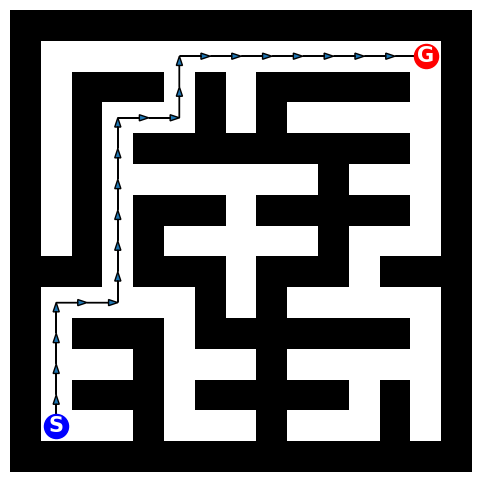

In [57]:
## 関数Hはゴールとの距離の二乗とする
func = lambda a,b: (a[0]-b[0])**2+(a[1]-b[1])**2

execute_Astar(m, func)